In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from statsmodels.stats.anova import AnovaRM
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [23]:
pd.options.display.max_columns = 500000000
df = pd.read_csv(r"C:\Users\Ty Gelman\OneDrive\Documents\Combined_OA_Data.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,ID,Group,Time point,Modified time,Sample type,Joint,Limb,COMP,CP II,C2C,IL-2,CS846,IL6,IL-8,MCP-1,KC,MMP-2,MMP-3,MMP-1,IL-15,IL-18,MMP-8,MMP-9,Tab,Unnamed: 24,Unnamed: 25,Number
0,N1L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,0,31.764,180.276,48144.504,2620.248000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,1.0
1,N2L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,0,91.572,377.868,55718.616,2357.544000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,2.0
2,N3L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,0,89.724,201,56717.88,2700.984000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,3.0
3,N4L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,0,67.56,208.332,31562.448,1950.528000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,4.0
4,N5L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,0,73.308,220.548,30723.144,2326.896000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,5.0
5,N6L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,0,91.572,154.248,22444.8,2569.224000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,6.0
6,N7L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30575.424,2420.592000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,7.0
7,N8L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,0,0,141.552,39582.672,2679.384000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,8.0
8,N9L,CONTROL,0,baseline,SF,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29980.056,2171.184000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,NaN
9,N1L,CONTROL,0,baseline,serum,KNEE,L,NaN,NaN,NaN,NaN,NaN,NaN,3429.325,302.36,211.5,2561.29,293.470000,NaN,NaN,NaN,NaN,NaN,OA response to surgery,NaN,NaN,10.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

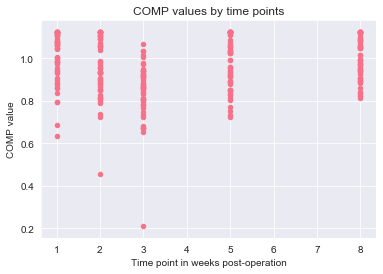

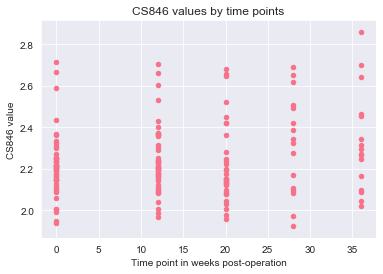

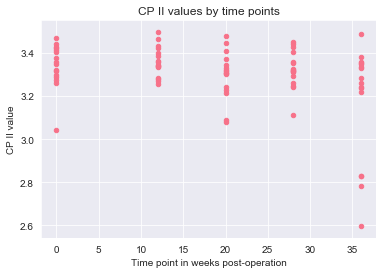

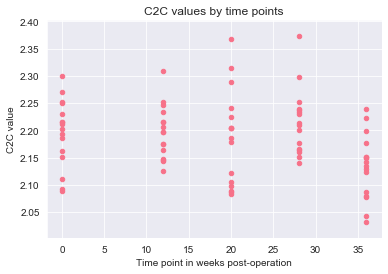

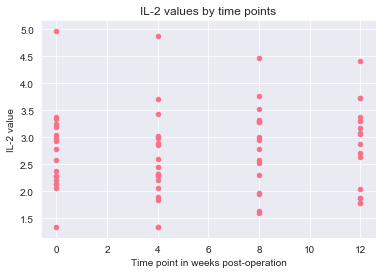

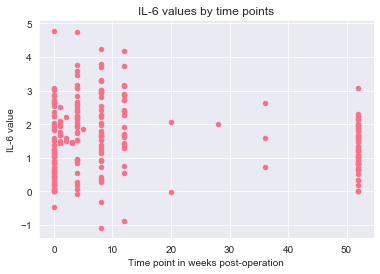

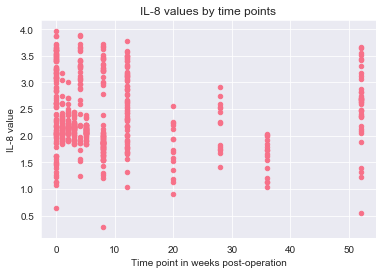

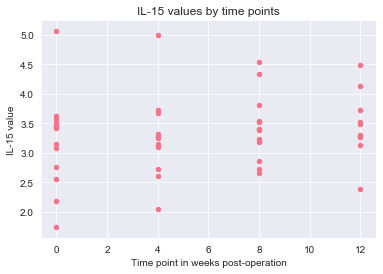

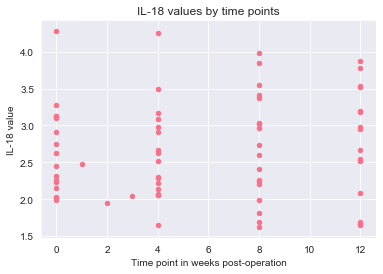

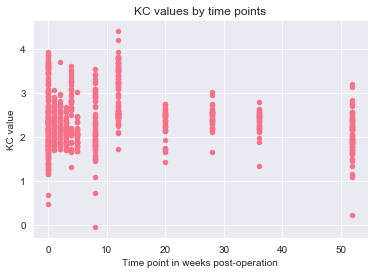

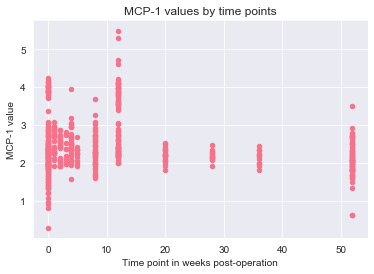

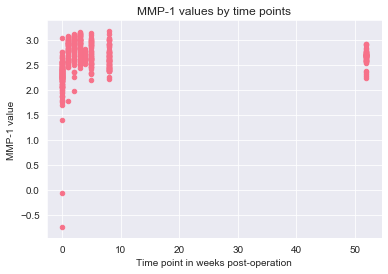

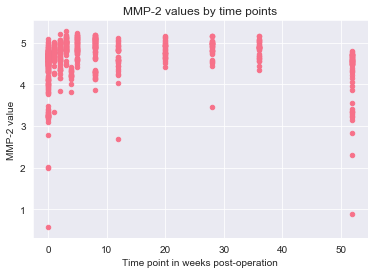

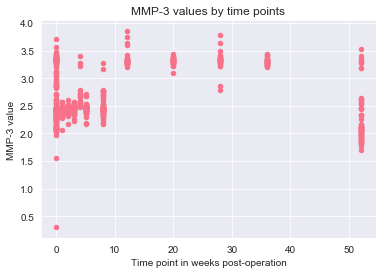

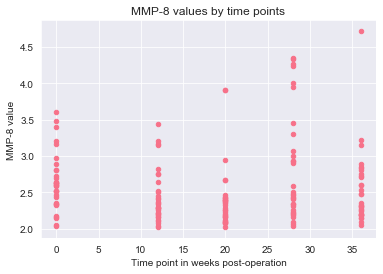

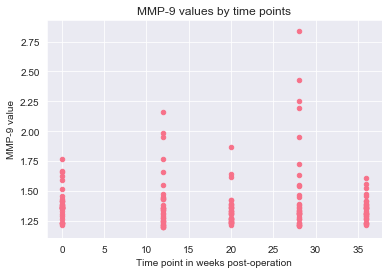

In [22]:
#Hypothesis 1 scatterplots
MultiPDF = PdfPages(r"C:\Users\Ty Gelman\OneDrive\Desktop\H1_SP_Figures.pdf")
count = 0
for column in df:
    count += 1
    if count == 24:
        break
    if count >= 8:
        H1 = df[["Time point", column]]
        H1 = H1.dropna()
        H1[column] = pd.to_numeric(H1[column],errors='coerce')
        H1[column] = np.log10(H1[column])
        H1.plot.scatter(x = 'Time point', y = column) 
        plt.title(column + " values by time points")
        plt.xlabel("Time point in weeks post-operation")
        plt.ylabel(column + " value")  
        MultiPDF.savefig()
MultiPDF.close()

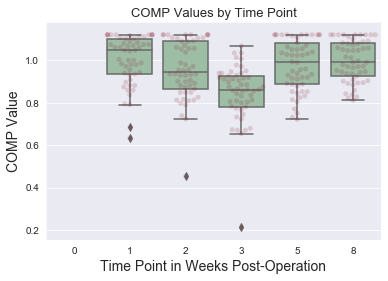

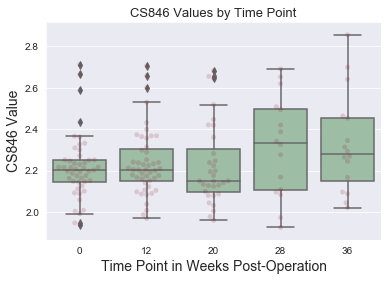

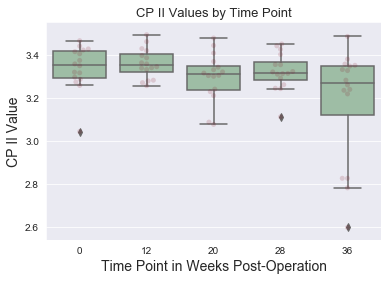

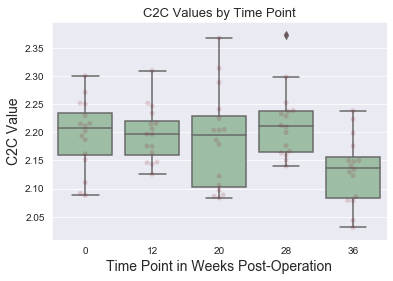

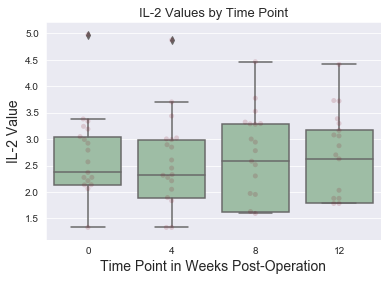

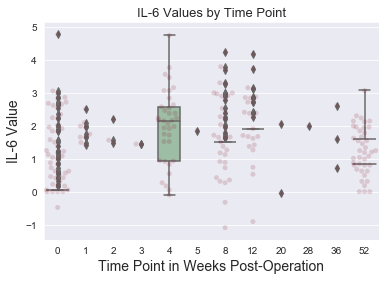

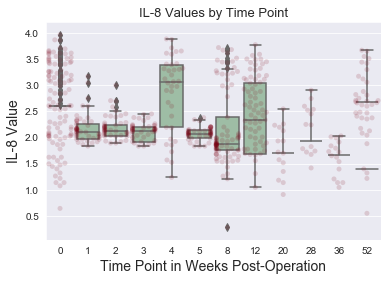

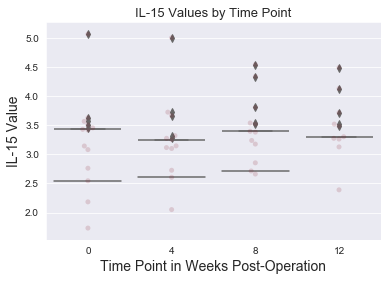

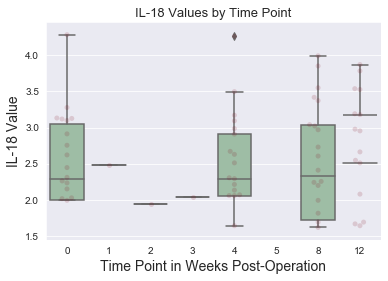

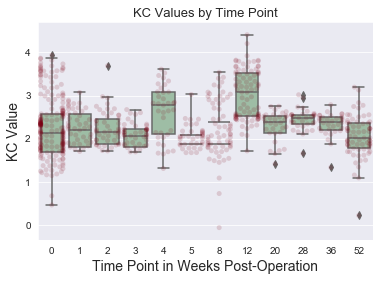

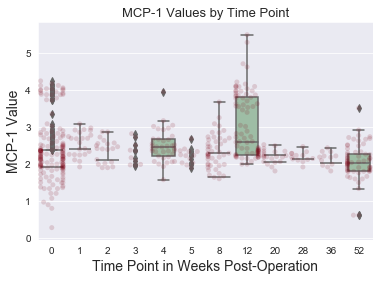

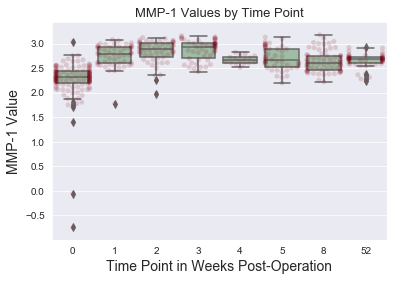

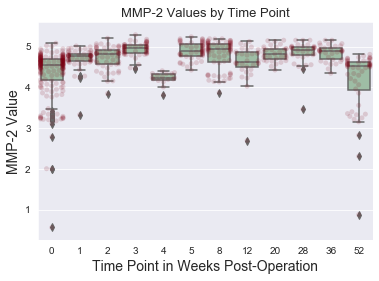

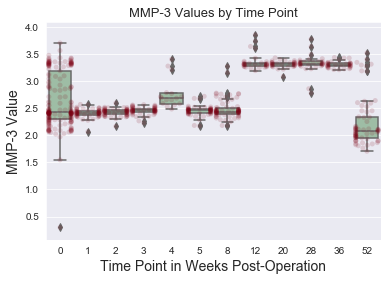

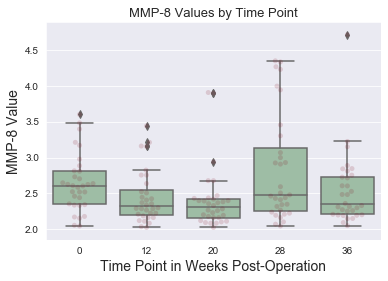

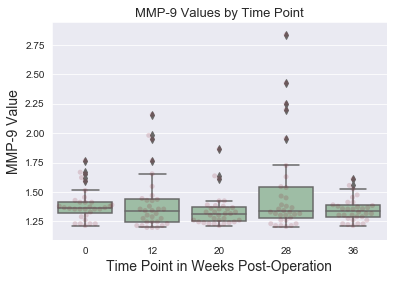

In [17]:
#Hypothesis 1 boxplots with points
MultiPDF = PdfPages(r"C:\Users\Ty Gelman\OneDrive\Desktop\H1_BP_Figures.pdf")
count = 0
for column in df:
    count += 1
    if count == 24:
        break
    if count >= 8:
        H1 = df[["Time point", column]]
        H1 = H1.dropna()
        H1[column] = pd.to_numeric(H1[column],errors='coerce')
        H1[column] = np.log10(H1[column])
        plt.figure()
        sns.set_style("darkgrid")
        sns.set_palette("husl",1)
        plt.title(column + " Values by Time Point")
        ax = sns.boxplot(x = "Time point", y = column, data = H1, color = "#99c2a2", showfliers = True)
        ax = sns.swarmplot(x = "Time point", y = column, data = H1, color = "#7d0013", alpha = 0.15)
        ax.axes.set_title(column + " Values by Time Point", fontsize=13)
        ax.set_ylabel(column + " Value", fontsize=14)
        ax.set_xlabel("Time Point in Weeks Post-Operation", fontsize=14)
        MultiPDF.savefig()
MultiPDF.close()

C:\Users\Ty Gelman\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


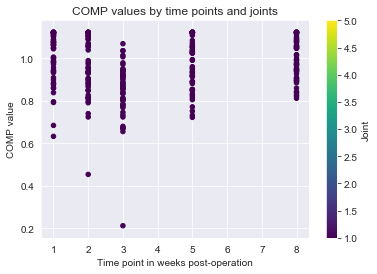

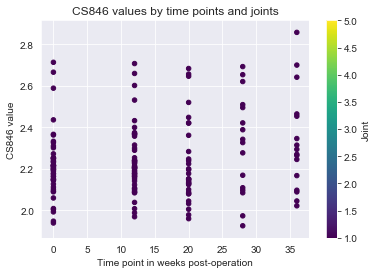

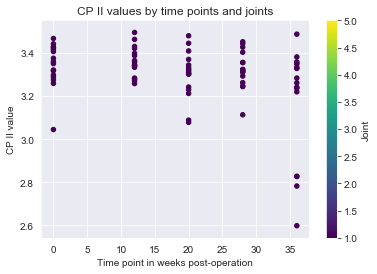

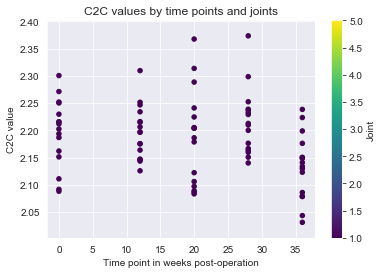

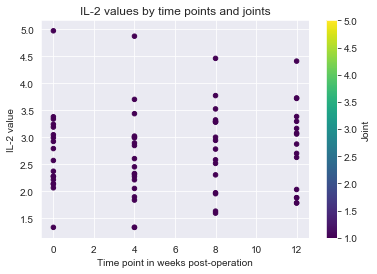

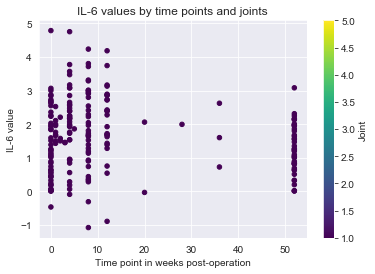

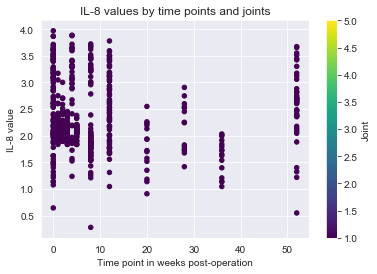

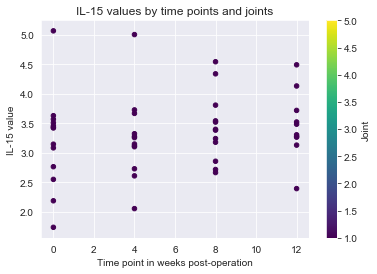

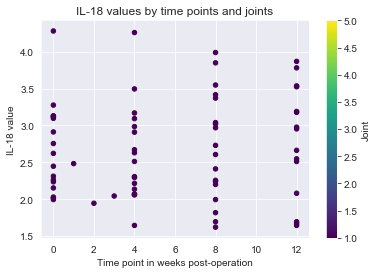

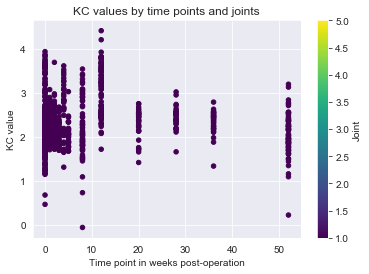

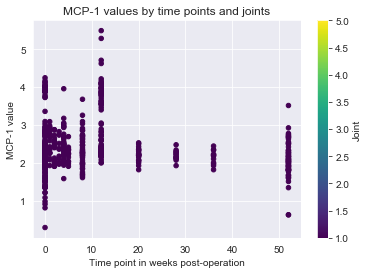

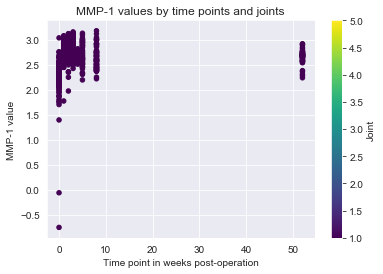

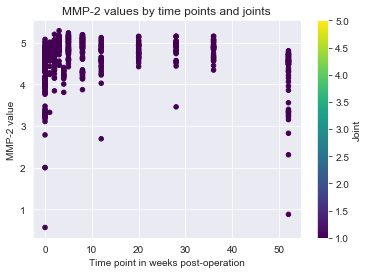

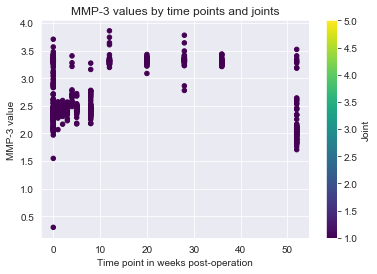

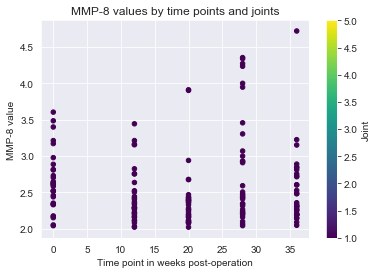

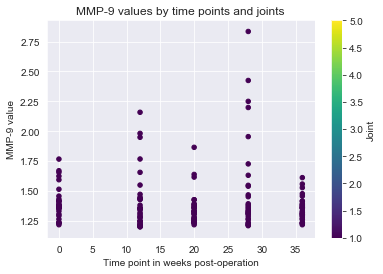

In [16]:
#Hypothesis 2 color coded scatterplots
MultiPDF = PdfPages(r"C:\Users\Ty Gelman\OneDrive\Desktop\H2_Figures.pdf")
count = 0
for column in df:
    count += 1
    if count == 24:
        break
    if count >= 8:
        H2 = df[["Time point", column, "Joint"]]
        H2["Joint"] = df["Joint"].apply(lambda x: float(hash(x) % 200) / 200)
        H2 = H2.dropna()
        H2[column] = pd.to_numeric(H2[column],errors='coerce')
        H2[column] = np.log10(H2[column])
        H2.plot.scatter(x = 'Time point', y = column, c = "Joint" ,cmap="viridis", sharex = False, vmin = 1, vmax = 5)
        plt.title(column + " values by time points and joints")
        plt.xlabel("Time point in weeks post-operation")
        plt.ylabel(column + " value")
        MultiPDF.savefig()
MultiPDF.close()

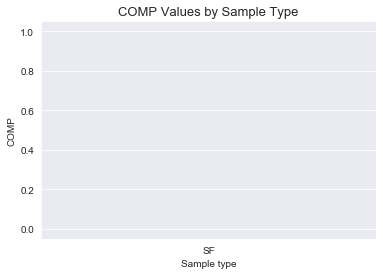

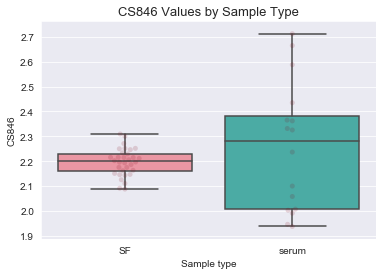

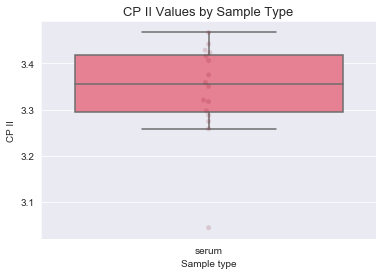

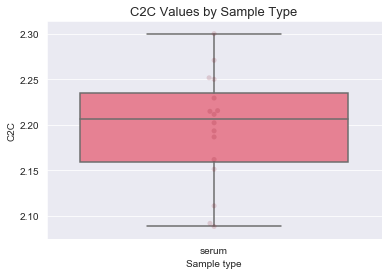

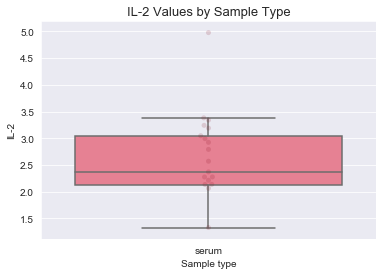

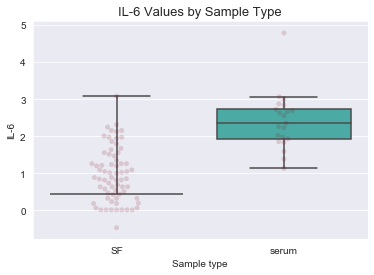

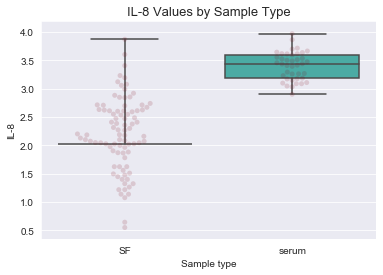

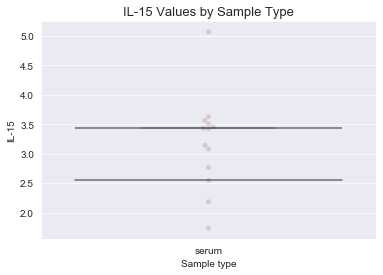

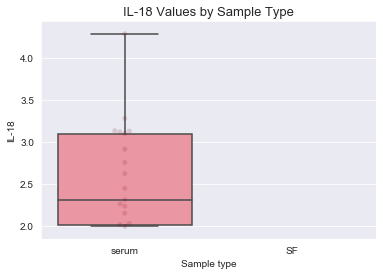

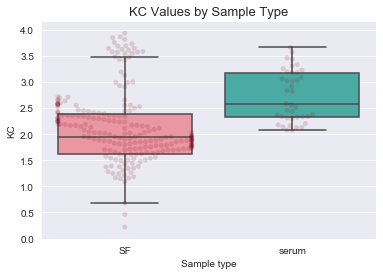

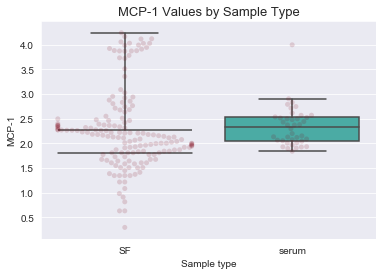

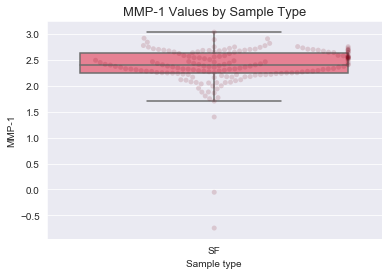

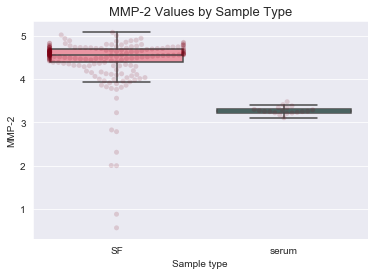

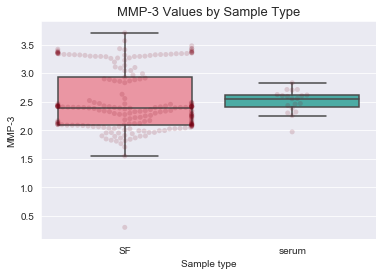

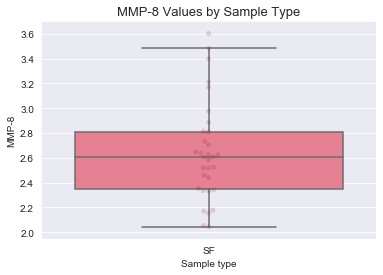

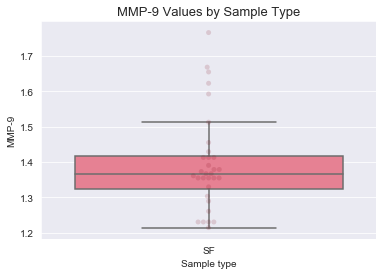

In [15]:
#Hypothesis 3 only control data boxplots
MultiPDF = PdfPages(r"C:\Users\Ty Gelman\OneDrive\Desktop\H3_Figures.pdf")
count = 0
for column in df:
    count += 1
    if count == 24:
        break
    if count >= 8: 
        H3 = df[["Sample type", column, "Modified time"]]
        H3 = H3.loc[H3['Modified time'] == 'baseline']
        H3 = H3.dropna()
        H3[column] = pd.to_numeric(H3[column],errors='coerce')
        H3[column] = np.log10(H3[column])
        plt.figure()
        sns.set_style("darkgrid")
        sns.set_palette("husl",1)
        plt.title(column + " Values by Sample Type", fontsize = 13)
        sns.boxplot(x = "Sample type", y = column, data = H3, showfliers = False)
        ax = sns.swarmplot(x = "Sample type", y = column, data = H3, color = "#7d0013", alpha = 0.15)
        MultiPDF.savefig()
MultiPDF.close()